In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(x):
    return 0.5 + 0.1*x + 0.2 * x**2 + 0.03 * x**3

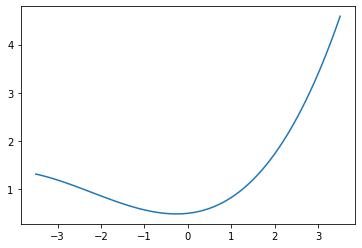

In [3]:
x_list = np.linspace(-3.5,3.5,71)
plt.plot(x_list, func(x_list))

## Create Data

In [4]:
x_points = np.linspace(-3,3,13)
data = np.array([x_points,func(x_points)])

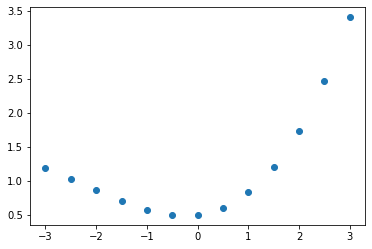

In [5]:
plt.scatter(data[0], data[1])

## Sum

In [8]:
def integralSum(data):
    return np.sum(data[1]) * (data[0,-1] - data[0,0]) /(len(data[1]) - 1)

In [9]:
integralSum(data)

7.800000000000001

## Trapezoidal Method

In [15]:
def integralTrapezoidal(data):
    a = 0
    for i in range(len(data[0]) - 1):
        a = a + (data[1,i+1] + data[1,i]) / 2 * (data[0,i+1] - data[0,i])
    return a

In [16]:
integralTrapezoidal(data)

6.650000000000001

In [17]:
# For equidistant data
def integralTrapezoidalEq(data):
    return (1/2*data[1,0] + np.sum(data[1,1:-1]) + 1/2*data[1,-1]) * (data[0,-1] - data[0,0]) /(len(data[1]) - 1)

In [18]:
integralTrapezoidalEq(data)

6.650000000000001

## Simpson Rule and Newton-Cortes Equation

In [19]:
# Simpson Rule
def integralSimpson(data):
    return (1/3*data[1,0] + 4/3*np.sum(data[1, 1:-1:2]) + 2/3*np.sum(data[1,2:-1:2]) + 1/3*data[1,-1]) \
            * (data[0,-1] - data[0,0]) /(len(data[1]) - 1)

In [20]:
integralSimpson(data)

6.599999999999999

## Project: Rotational Energy & Moment of Inertia - Start with a point mass

### Rotation of a point mass around a point in space

In [21]:
m = 1 # mass: kg
r = 1 # radius: m
w = 1 # angular velocity: 1/s
t_array = np.linspace(0,2*np.pi, 100)
x_array = r*np.cos(w * t_array)
y_array = r*np.sin(w * t_array)

In [28]:
# plt.plot(x_array, y_array)
# plt.xlabel('x-coordinate')
# plt.ylabel('y-coordinate')

Text(0, 0.5, 'y-coordinate')

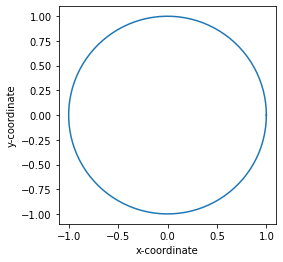

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.plot(x_array, y_array)
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')

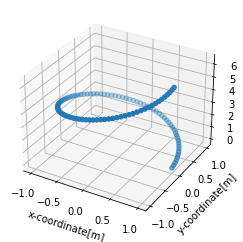

In [29]:
plt3D = plt.axes(projection='3d')
plt3D.set_xlabel('x-coordinate[m]')
plt3D.set_ylabel('y-coordinate[m]')
plt3D.set_zlabel('time[s]')
plt3D.scatter(x_array,y_array, t_array)

### Calculate Energy

In [30]:
period = 2*np.pi / w
path = 2*np.pi*r
velocity = r*w

In [31]:
# Rotational Energy = Kinetic Energy
m/2 * velocity**2

0.5

## Rotation Energy of multiple point masses

### Rotating a stick around one end

In [32]:
s = 1  # length of a stick

In [33]:
num_points = 100
r_list = np.linspace(0,s,num_points)

(-1.2, 1.2)

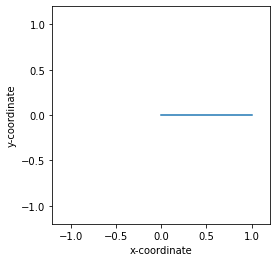

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.plot(r_list, np.zeros(num_points))
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.xlim([-1.2*s, 1.2*s])
plt.ylim([-1.2*s, 1.2*s])

In [36]:
1/3*m*s**2 /2 * w**2    # Energy

0.16666666666666666

In [37]:
# Numerical Result

#K.E
(m/num_points)/2 * w**2 * np.sum(r_list**2)

0.16750841750841755

### Rotating a stick around centre

In [42]:
l = 1
num_points = 1000
r_list = np.linspace(-l/2,l/2,num_points)

(-1.0, 1.0)

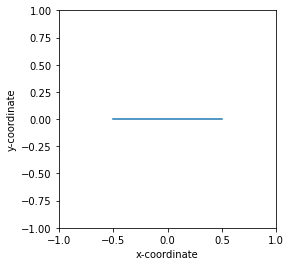

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.plot(r_list, np.zeros(num_points))
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.xlim([-l, l])
plt.ylim([-l, l])

In [45]:
1/12*m*l**2 /2 * w**2    # Energy

0.041666666666666664

In [46]:
# Numerical Result

#K.E
(m/num_points)/2 * w**2 * np.sum(r_list**2)

0.041750083416750086

## Rotating a Sphere: Numerical Solution

In [47]:
2/5*m*l**2 / 2 * w**2  # Energy

0.2

In [48]:
# Numerical Result

num_points = 30

In [50]:
coord_list = []
counter = 0
contribution = 0

for x in np.linspace(-l,l,num_points):
    for y in np.linspace(-l,l,num_points):
        for z in np.linspace(-l,l,num_points):
            if(np.linalg.norm([x,y,z]) <= r):
                coord_list.append([x,y,z])
                counter += 1
                contribution += np.linalg.norm([x,y,0])**2

In [51]:
counter

12712

In [52]:
contribution

5069.10820451838

In [53]:
coord_list = np.transpose(coord_list)

Text(0.5, 0, 'z-coordinate')

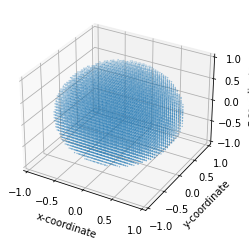

In [55]:
plt3D = plt.axes(projection='3d')
plt3D.scatter3D(coord_list[0], coord_list[1], coord_list[2], s=0.1)
plt3D.set_xlabel('x-coordinate')
plt3D.set_ylabel('y-coordinate')
plt3D.set_zlabel('z-coordinate')


In [56]:
(m/counter) * contribution /2 * w**2

0.1993827959612327

## Project: Magnetic Field of a Charged Wire

In [57]:
mu0 = 1

# Straight Wire
j0 = 1
r0 = 0.001
l0 = 1000

In [67]:
def j(r):
    if(np.sqrt(r[0]**2 + r[1]**2) > r0):
        return np.array([0.0,0.0,0.0])
    else:
        return np.array([0.0,0.0,j0])

In [68]:
j(np.array([0,0,5]))

array([0., 0., 1.])

In [69]:
j(np.array([3,4.8,5]))

array([0., 0., 0.])

In [80]:
# Coordinates : Standard indexing is yxz, fix it by using indexing='ij'
coordMax = 4.9
num_points = 50
d = 2*coordMax/ num_points-1

coord = np.array(np.meshgrid(np.linspace(-coordMax, coordMax, num_points),
                            np.linspace(-coordMax, coordMax, num_points),
                            np.zeros(1),
                            indexing = 'ij'
                            ))

In [81]:
coord.shape

(3, 50, 50, 1)

In [82]:
print(coord[:,num_points//2 - 1, num_points//2, 0])
print(coord[:,num_points//2, num_points//2, 0])

[-0.1  0.1  0. ]
[0.1 0.1 0. ]


In [83]:
# Vector Potential
A = np.array(np.meshgrid(np.zeros(num_points),
                            np.zeros(num_points),
                            np.zeros(1),
                            indexing = 'ij'
                            ))

In [84]:
print(A[:,num_points//2 - 1, num_points//2, 0])
print(A[:,num_points//2, num_points//2, 0])

[0. 0. 0.]
[0. 0. 0.]


In [97]:
numint = 5001

In [98]:
for ix in np.arange(num_points):
    for iy in np.arange(num_points):
        # Position for which we are calculating A
        r = np.array([-coordMax + ix*d, -coordMax + iy*d, 0])
        for zj in np.linspace(-l0,l0, numint):
            rj = np.array([0,0, zj])
            A[:, ix, iy, 0] += j(rj)/ np.sqrt(r[0]**2 + r[1]**2 + rj[2]**2)

In [99]:
dz = 2*l0 / (numint-1)
# dy = 2*coordMax / (num_points-1)
# dx = 2*coordMax / (num_points-1)

# A = A* mu0/(4* np.pi) * dx*dy*dz

df = np.pi * r0**2
A =  A* mu0/(4* np.pi) * df*dz

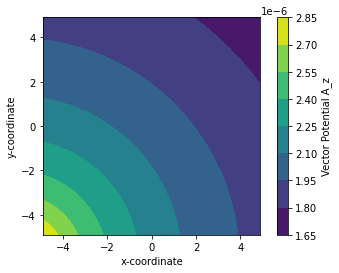

In [100]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')

plt.contourf(coord[0,:,:,0], coord[1,:,:,0], A[2,:,:,0])
cbar = plt.colorbar()
cbar.set_label('Vector Potential A_z')

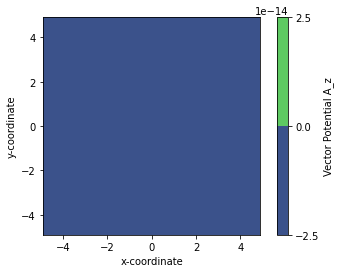

In [101]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')

plt.contourf(coord[0,:,:,0], coord[1,:,:,0], A[1,:,:,0])
cbar = plt.colorbar()
cbar.set_label('Vector Potential A_z')

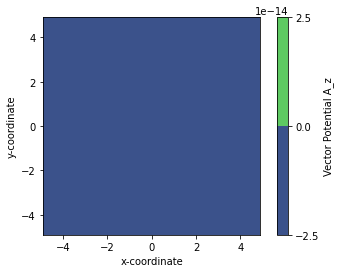

In [102]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')

plt.contourf(coord[0,:,:,0], coord[1,:,:,0], A[0,:,:,0])
cbar = plt.colorbar()
cbar.set_label('Vector Potential A_z')

In [103]:
# Magnetic Field
B = np.array(np.meshgrid(np.zeros(num_points),
                            np.zeros(num_points),
                            np.zeros(1),
                            indexing = 'ij'
                            ))

In [104]:
B[0,1:-1,1:-1,0] = (A[2,1:-1,2:,0] - A[2,1:-1,:-2,0]) / (2*d)
B[1,1:-1,1:-1,0] = -(A[2,2:,1:-1,0] - A[2,:-2,1:-1,0]) / (2*d)
B[2,1:-1,1:-1,0] = (A[1,2:,1:-1,0] - A[1,:-2,1:-1,0]) / (2*d) - (A[0,1:-1,2:,0] - A[0,1:-1,:-2,0]) / (2*d)

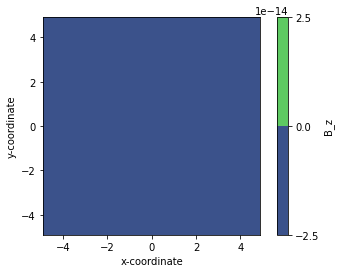

In [105]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')

plt.contourf(coord[0,:,:,0], coord[1,:,:,0], B[2,:,:,0])
cbar = plt.colorbar()
cbar.set_label('B_z')

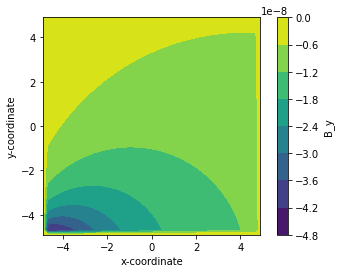

In [106]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')

plt.contourf(coord[0,:,:,0], coord[1,:,:,0], B[1,:,:,0])
cbar = plt.colorbar()
cbar.set_label('B_y')

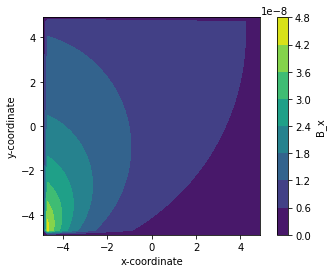

In [107]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')

plt.contourf(coord[0,:,:,0], coord[1,:,:,0], B[0,:,:,0])
cbar = plt.colorbar()
cbar.set_label('B_x')

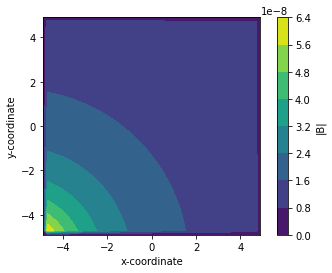

In [108]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')

plt.contourf(coord[0,:,:,0], coord[1,:,:,0], np.sqrt(B[0,:,:,0]**2 + B[1,:,:,0]**2 + B[2,:,:,0]**2 ))
cbar = plt.colorbar()
cbar.set_label('|B|')

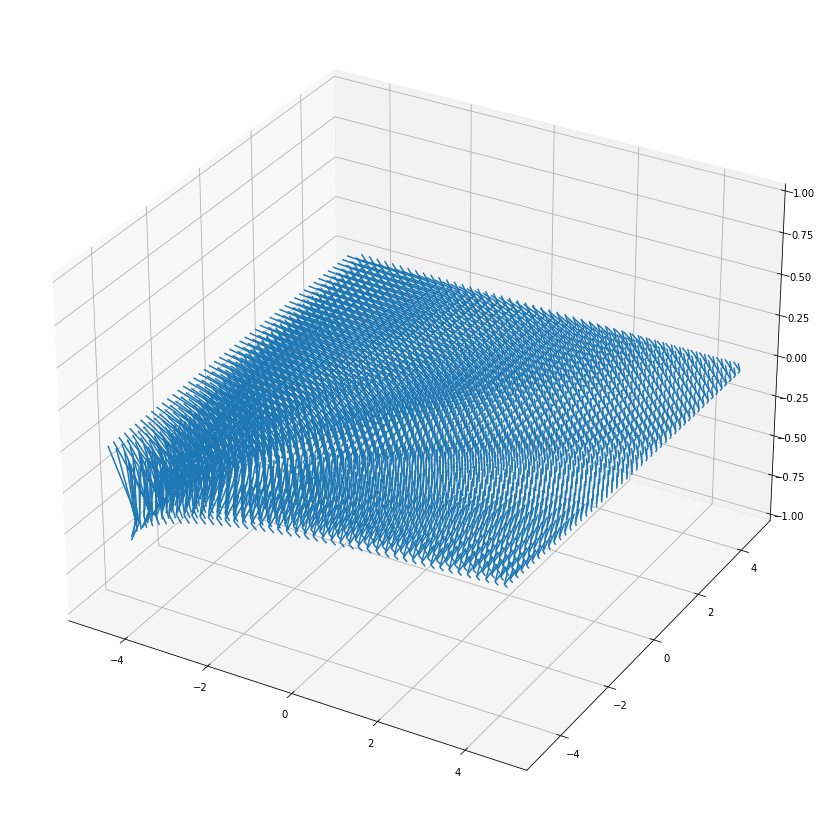

In [151]:
arrowplot = plt.axes(projection='3d')
arrowplot.set_zlim([-1,1])

scale = 5e7
arrowplot.quiver(
        coord[0], coord[1], coord[2],
        B[0]*scale, B[1]*scale, B[2]*scale
)

## Fourier Transforms

In [152]:
def integralTrapezoidal(data):
    a = 0
    for i in range(len(data[0]) - 1):
        a = a + (data[1,i+1] + data[1,i]) / 2 * (data[0,i+1] - data[0,i])
    return a

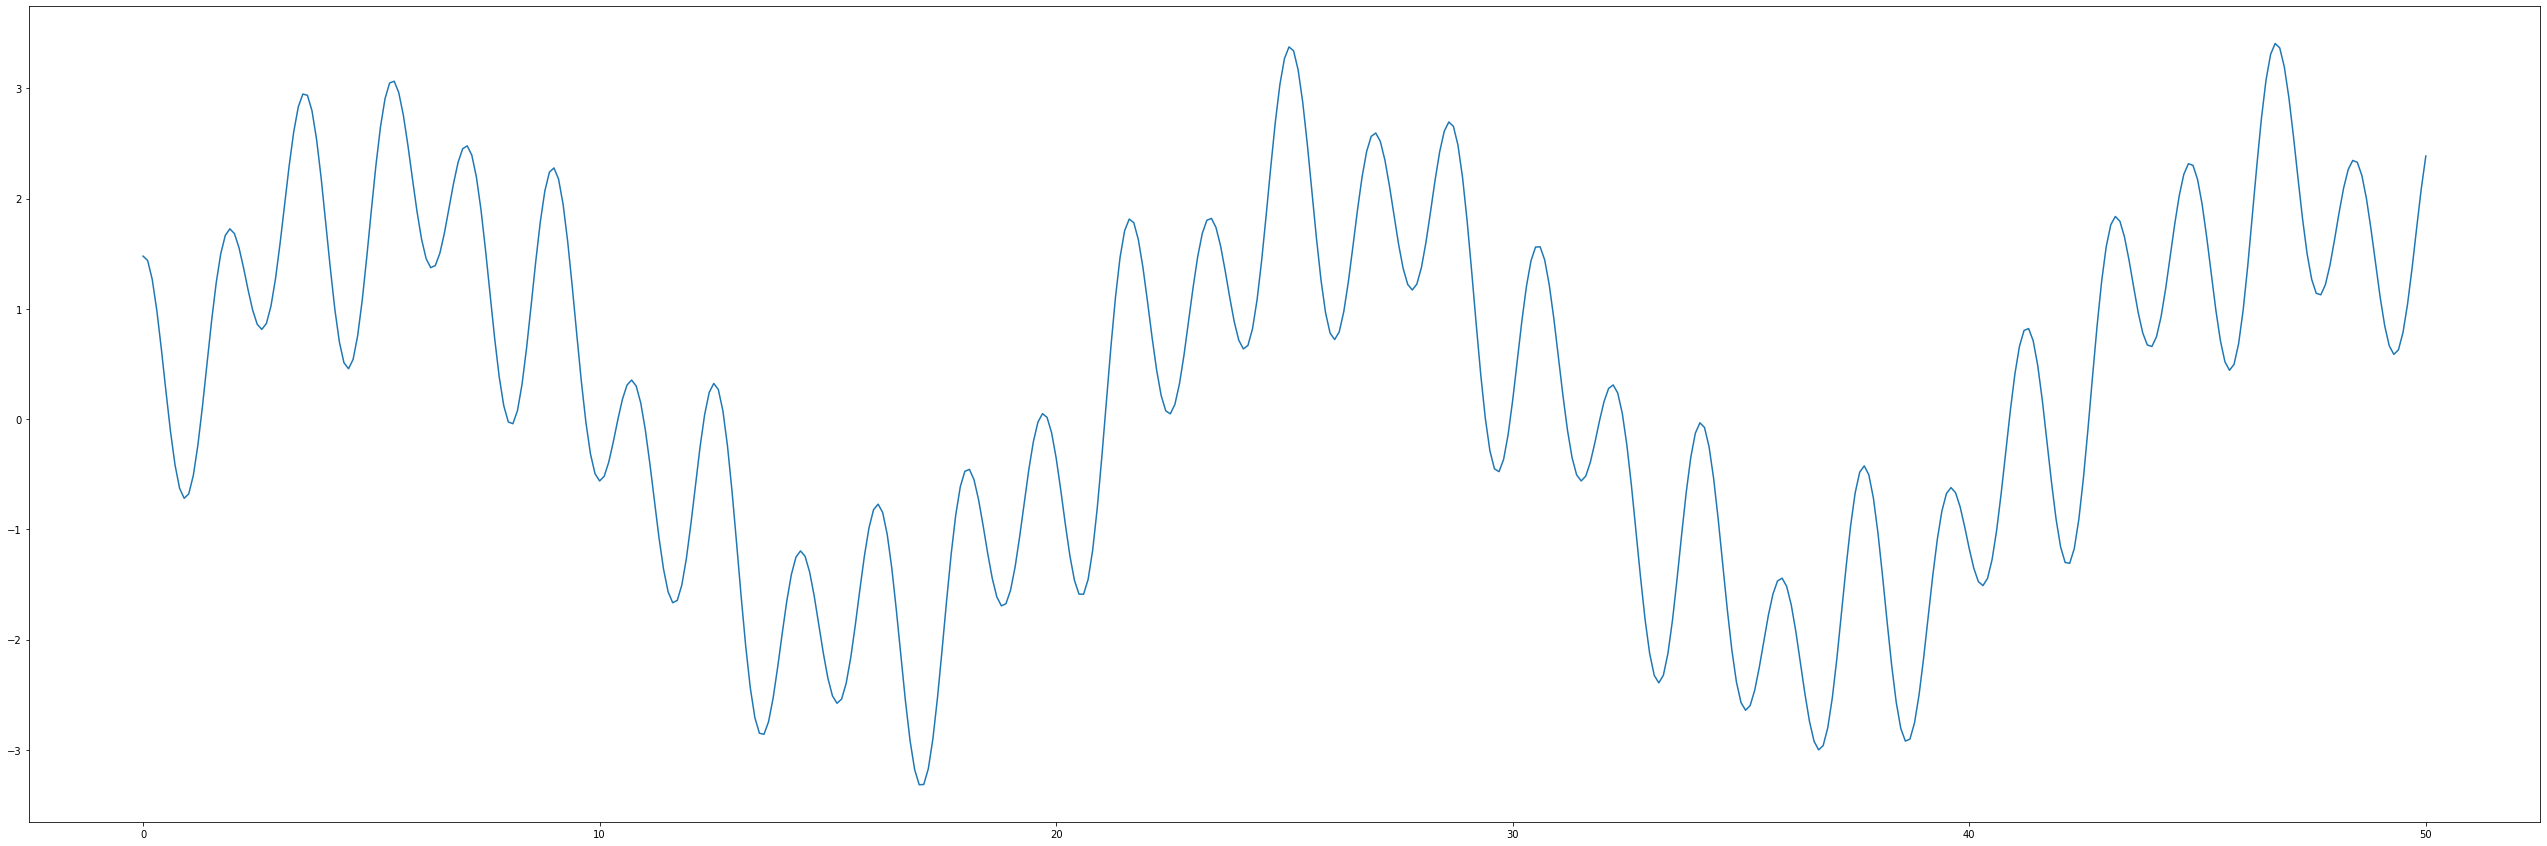

In [153]:
tlist = np.linspace(0,50,501)
freq1 = 2
freq2 = 0.3
freq3 = 3.5

ylist = 0.5*np.cos(freq1*tlist + 0.3) + 2*np.sin(freq2*tlist) + 1*np.cos(freq3*tlist)

data = np.array([tlist,ylist])
plt.plot(data[0],data[1])

In [154]:
 integralTrapezoidal(data)

11.373146764083113

## Fourier Transform to find characteristic frequencies

In [176]:
omega = 0.3
integrand = np.array([tlist, 1/np.sqrt(2*np.pi) *ylist* np.exp(1j*omega*tlist)])
print(abs(integralTrapezoidal(integrand))**2)

420.16655955096377


In [177]:
ft = np.array([[om, integralTrapezoidal(np.array([tlist, 1/np.sqrt(2*np.pi) *ylist* np.exp(1j*omega*tlist)]) )] for om in np.linspace(0,10,1001)])

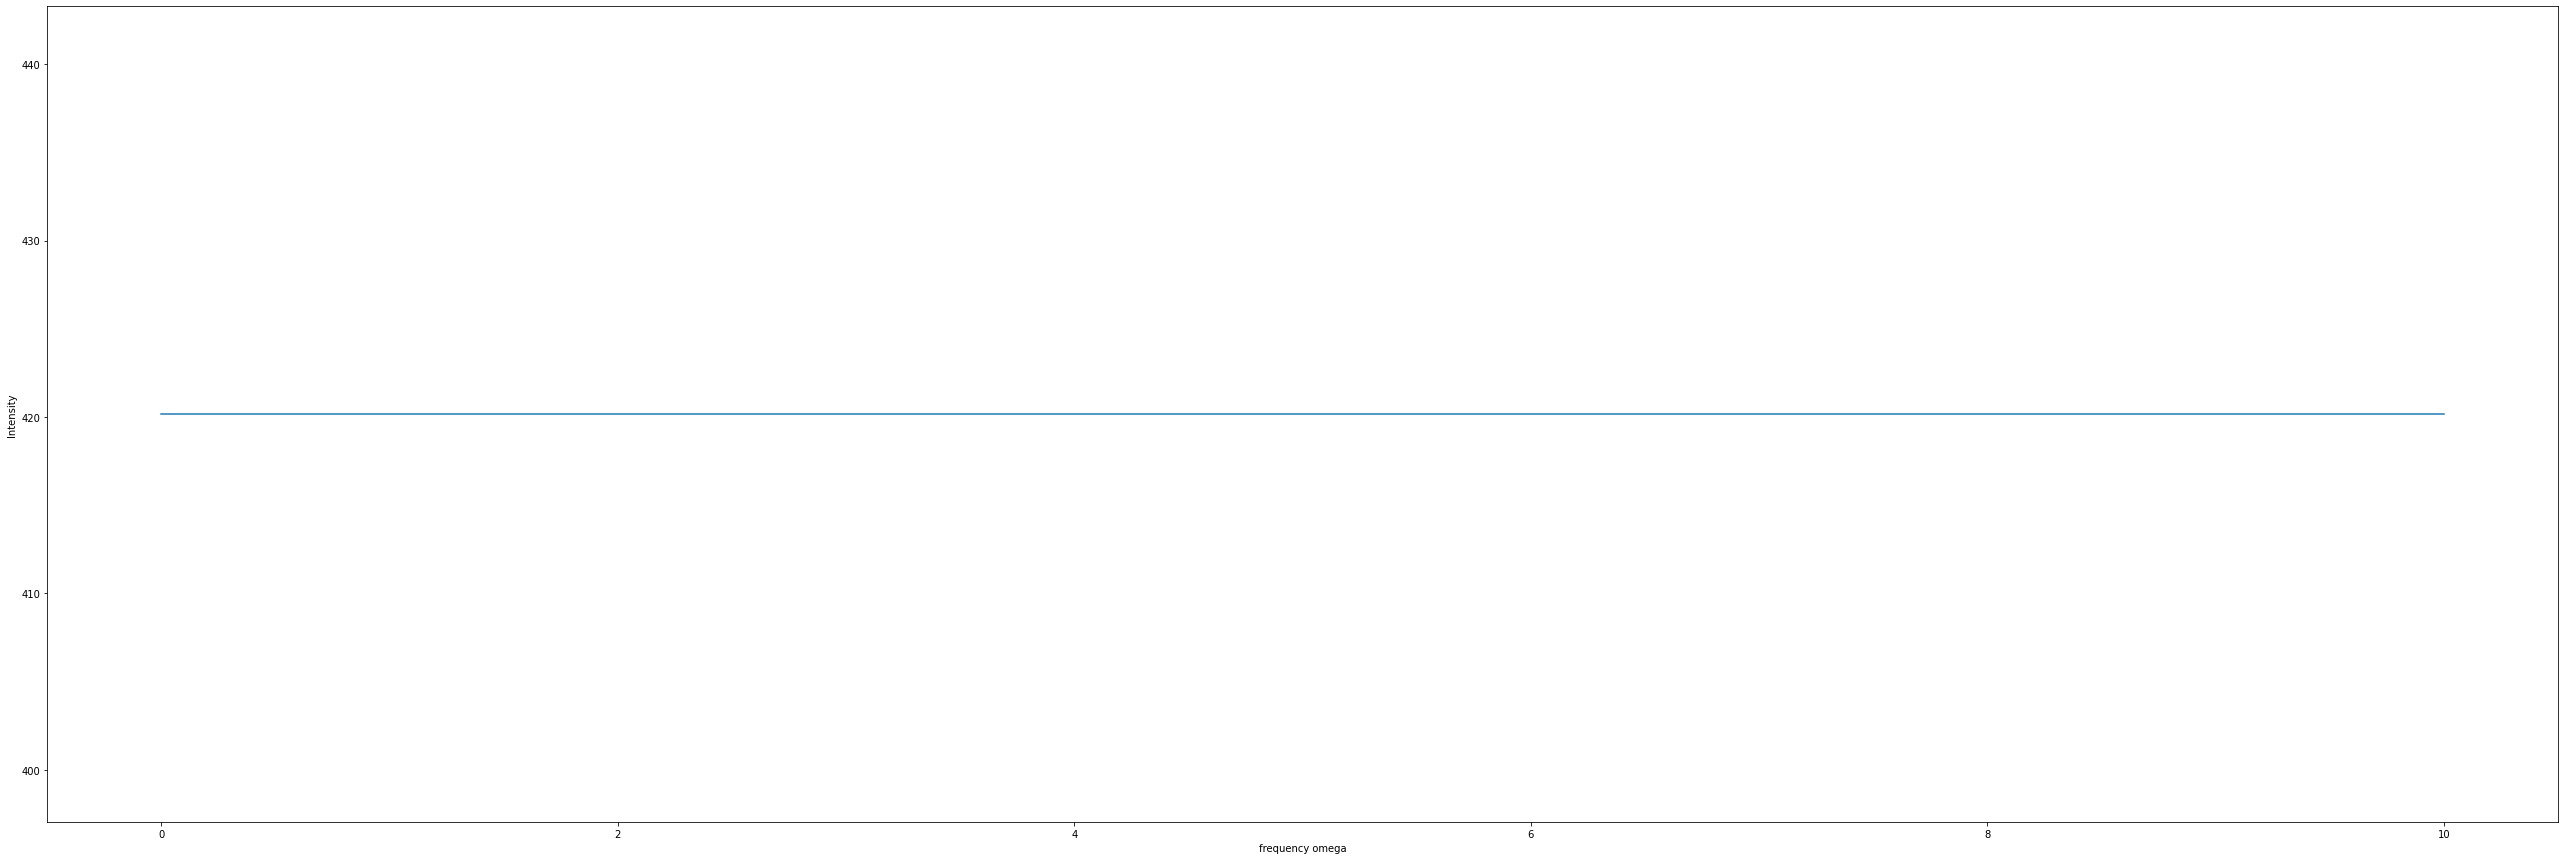

In [178]:
plt.xlabel('frequency omega')
plt.ylabel('Intensity')
plt.plot(ft[:,0], abs(ft[:,1])**2)

In [179]:
ft[25:35]

array([[0.25       +0.j        , 0.60539084+20.48902295j],
       [0.26       +0.j        , 0.60539084+20.48902295j],
       [0.27       +0.j        , 0.60539084+20.48902295j],
       [0.28       +0.j        , 0.60539084+20.48902295j],
       [0.29       +0.j        , 0.60539084+20.48902295j],
       [0.3        +0.j        , 0.60539084+20.48902295j],
       [0.31       +0.j        , 0.60539084+20.48902295j],
       [0.32       +0.j        , 0.60539084+20.48902295j],
       [0.33       +0.j        , 0.60539084+20.48902295j],
       [0.34       +0.j        , 0.60539084+20.48902295j]])

In [180]:
abs(ft[25:35,1])**2

array([420.16655955, 420.16655955, 420.16655955, 420.16655955,
       420.16655955, 420.16655955, 420.16655955, 420.16655955,
       420.16655955, 420.16655955])

## Using numpy module: FFT

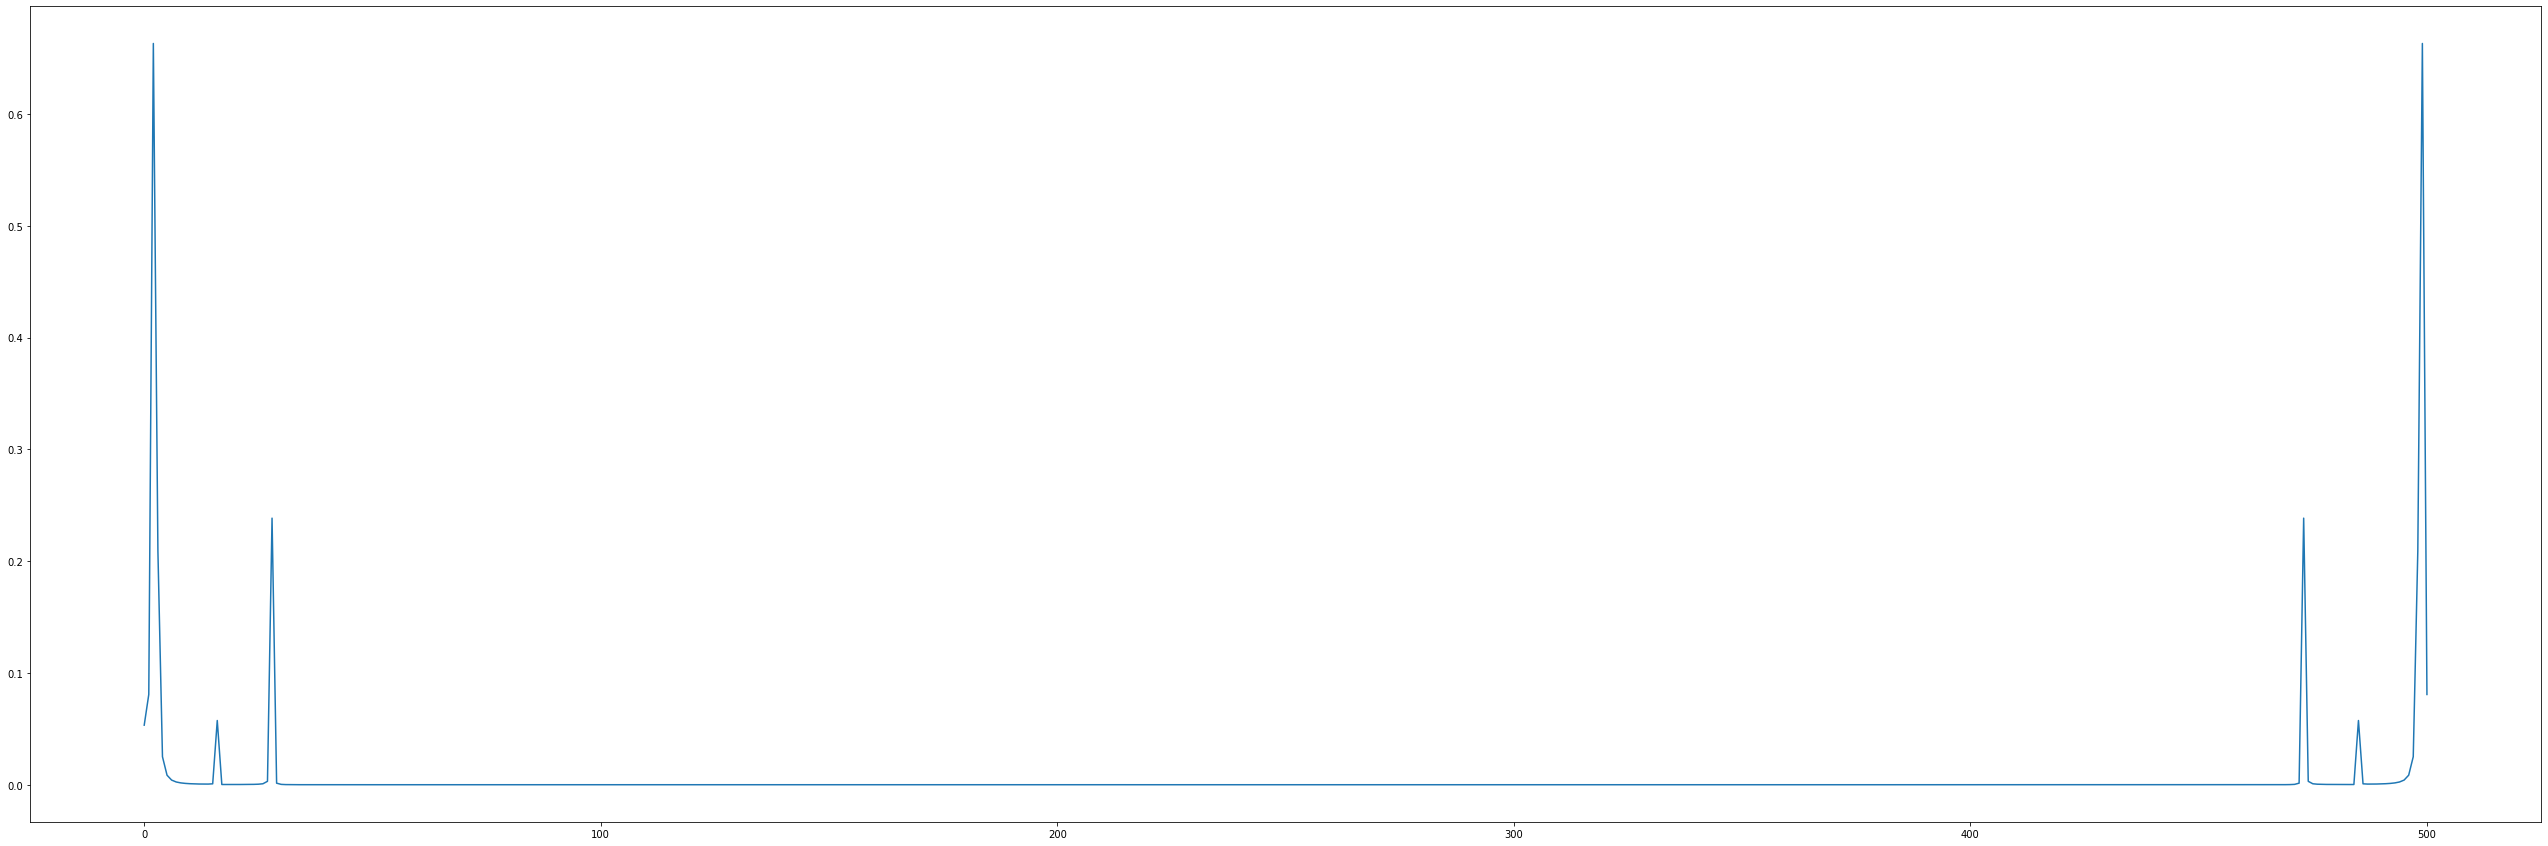

In [181]:
ft = np.fft.fft(ylist/len(ylist))
plt.plot(abs(ft)**2)

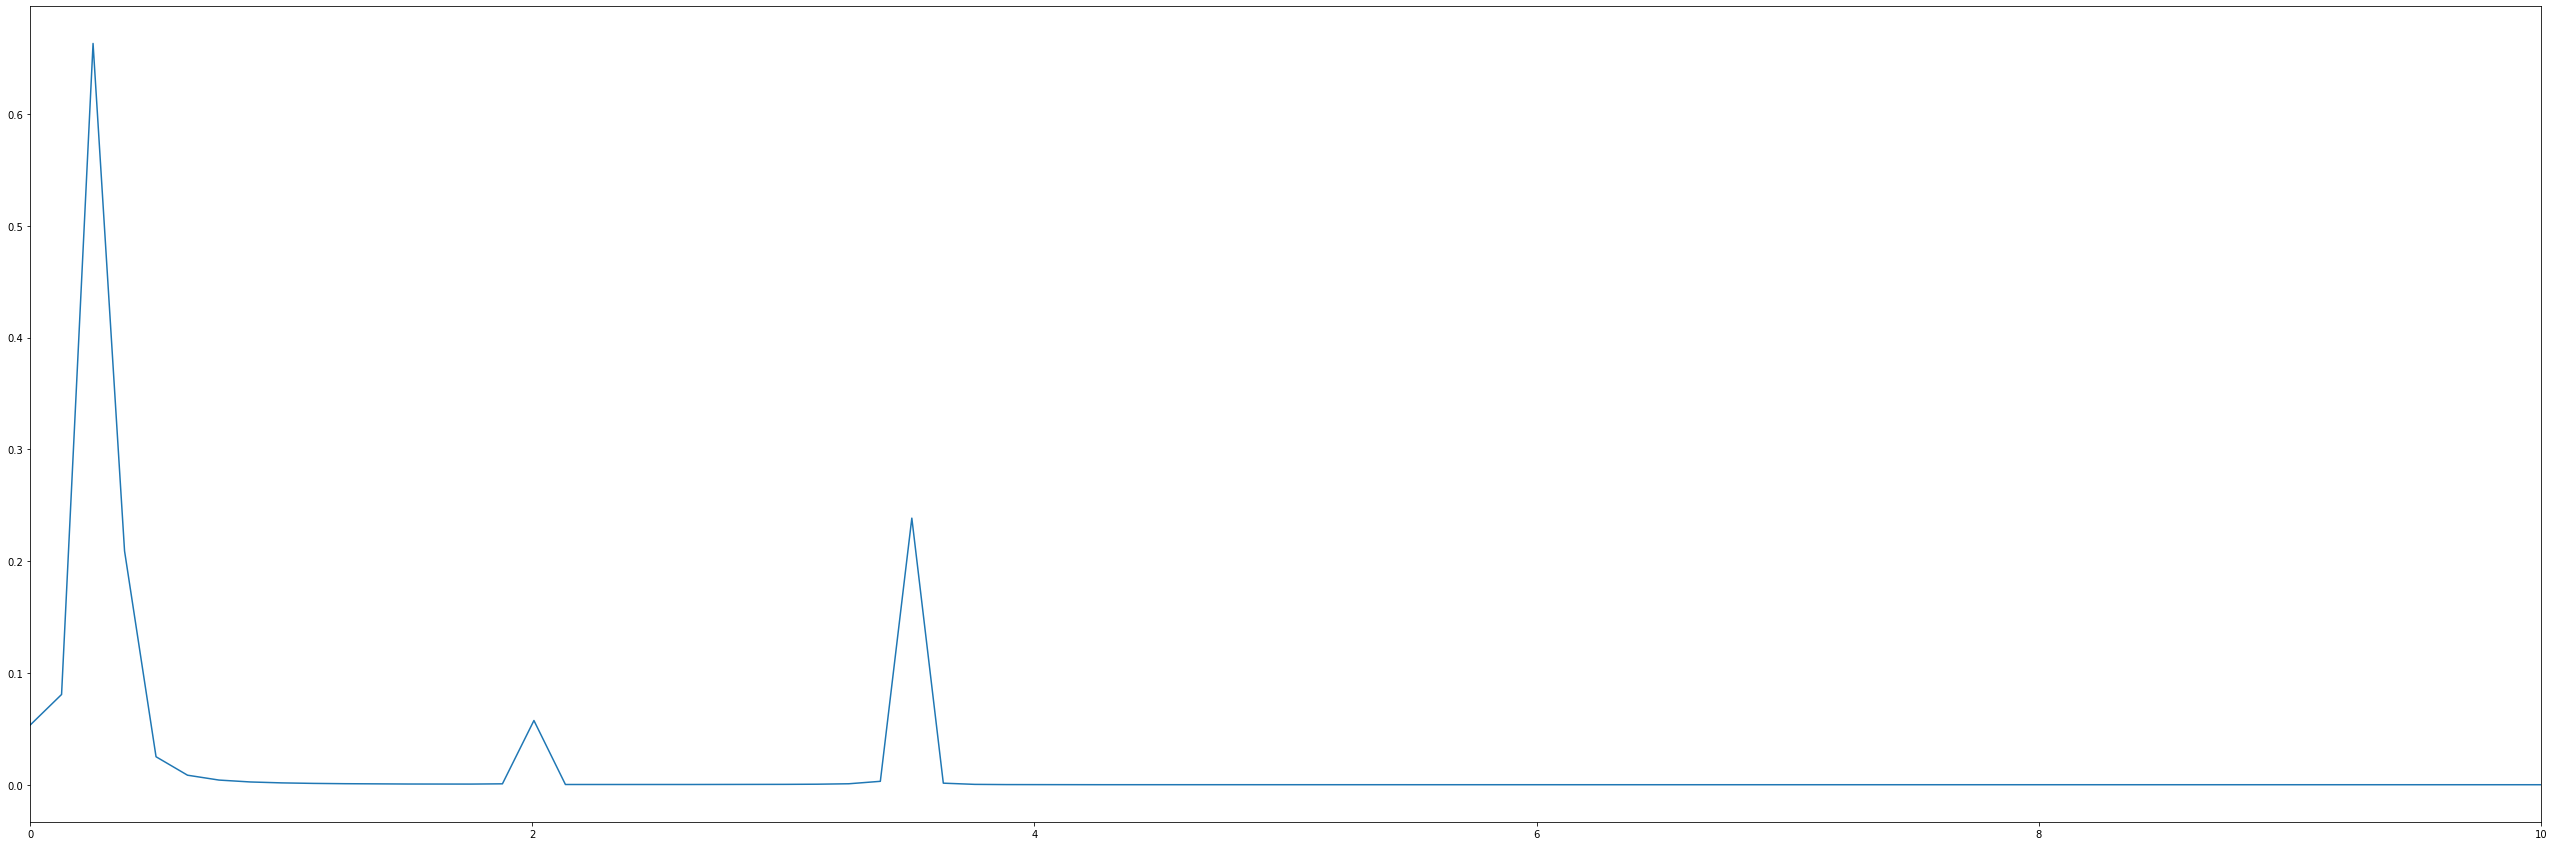

In [183]:
frequencies = np.arange(len(ylist))/ (len(ylist)*0.1)
plt.xlim([0,10])
plt.plot(frequencies*2*np.pi, abs(ft)**2 )